## Carga de Datos

In [2]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("Hey.csv")

In [ ]:
data['tweet'][148:152]

148                                              Hola!!!
149                                            Saludos a
150    real esa tarjeta es la neta, en general el ban...
151    :o si tengo cuenta pero nunca pedí la física, ...
Name: tweet, dtype: object

In [ ]:
data['date'] = pd.to_datetime(data['date'], errors="coerce")

In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet
0,2023-01-01,NaN,"Resuelto, muchísimas gracias , excelente servi..."
1,2023-01-02,NaN,"Muchas gracias, espero su dm"
2,2023-01-02,NaN,Muchas gracias!
3,2023-01-02,NaN,Algo similar me paso. Quería renovar mi token ...
4,2023-01-02,NaN,Yeeeei! a través de mi cuenta en acabo de cont...


In [ ]:
import nltk

In [ ]:
data['tweet']

0      Resuelto, muchísimas gracias , excelente servi...
1                           Muchas gracias, espero su dm
2                                        Muchas gracias!
3      Algo similar me paso. Quería renovar mi token ...
4      Yeeeei! a través de mi cuenta en acabo de cont...
                             ...                        
807                     Ahora confirmo, gracias estimado
808                       😔 de acuerdo!! Muchas gracias.
809    Tío cuando me van a graduar, tengo la TDC gara...
810    una duda, con quién tengo que ver si tengo pro...
811    Wey, lo mejor de es que puedo pagar con Apple ...
Name: tweet, Length: 812, dtype: object

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fecha')
plt.xticks(rotation=45)
_ = plt.ylabel('Frecuencia de tweets')

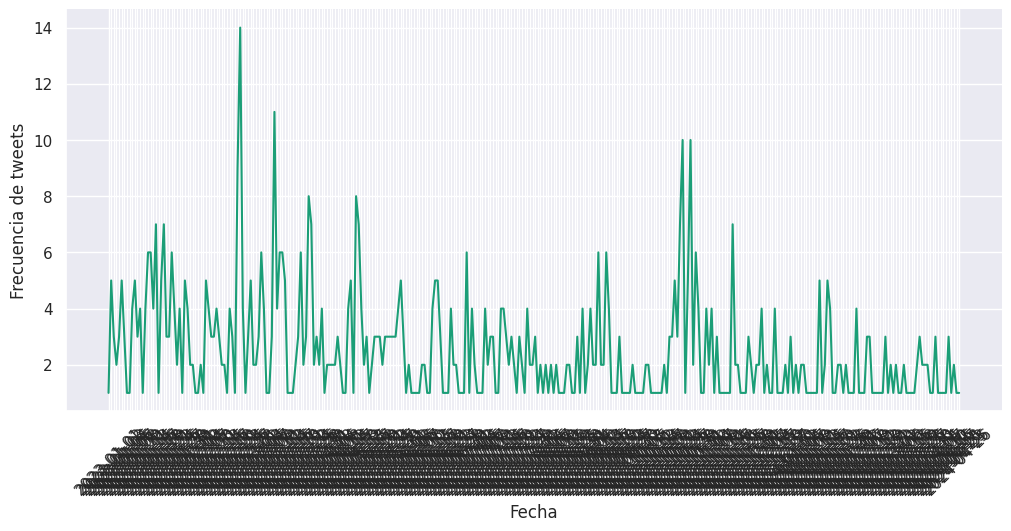

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fecha')
plt.xticks(rotation=45)
_ = plt.ylabel('Frecuencia de tweets')

# Preprocesamiento

## Manejo de puntuación y minúsculas

In [ ]:
# Convertir todo a minusculas
data['tweet'] = data['tweet'].str.lower()


In [ ]:
data['tweet']

0      resuelto, muchísimas gracias , excelente servi...
1                           muchas gracias, espero su dm
2                                        muchas gracias!
3      algo similar me paso. quería renovar mi token ...
4      yeeeei! a través de mi cuenta en acabo de cont...
                             ...                        
807                     ahora confirmo, gracias estimado
808                       😔 de acuerdo!! muchas gracias.
809    tío cuando me van a graduar, tengo la tdc gara...
810    una duda, con quién tengo que ver si tengo pro...
811    wey, lo mejor de es que puedo pagar con apple ...
Name: tweet, Length: 812, dtype: object

In [ ]:
# Quitar puntuación y acentos
import string

# Manejo de puntuación en español

def limpiar_puntuacion(texto):
    # Agregar los signos de puntuación en español
    puntuacion_espanol = string.punctuation + '¡¿'

    # Crear un diccionario de traducción para eliminar la puntuación
    translator = str.maketrans('', '', puntuacion_espanol)

    # Aplicar la traducción y eliminar la puntuación
    texto_sin_puntuacion = texto.translate(translator)

    return texto_sin_puntuacion

# Ejemplo de uso
texto = "¡Hola mundo! Este es un ejemplo con signos de ""puntuación' en español."
texto_limpiado = limpiar_puntuacion(texto)

print(texto_limpiado)

Hola mundo Este es un ejemplo con signos de puntuación en español


In [ ]:
!pip install unidecode

In [ ]:
# Integración del manejo de
from unidecode import unidecode

def quitar_acentos(texto):
    return unidecode(texto)

# Ejemplo de uso
texto_con_acentos = "¡Hola, mundo! Este es un éjemplo con ácentüs, puntos, español, etc."
texto_sin_acentos = quitar_acentos(texto_con_acentos)

print(texto_sin_acentos)


!Hola, mundo! Este es un ejemplo con acentus, puntos, espanol, etc.


In [ ]:
# integración de todo lo relacionado con puntuación

# Función que limpia todo los de puntuación y acentos del texto

def limpiar_puntuacion(texto):

    # Eliminar puntos y comas
    texto_sin_puntos = texto.replace(".", " ").replace(",", " ") # Es impotante para configuraciones decimales o combinaciones como f-25 f25 registro 95

    # Eliminar puntuación inglés
    texto_sin_puntuacion = texto_sin_puntos.translate(str.maketrans("" ,"", string.punctuation))

    # Agregar los signos de puntuación en español
    puntuacion_espanol = string.punctuation + '¡¿'

    # Crear un diccionario de traducción para eliminar la puntuación
    translator = str.maketrans('', '', puntuacion_espanol)

    # Aplicar la traducción y eliminar la puntuación
    texto_sin_puntuacion = texto_sin_puntuacion.translate(translator)

    # Eliminar guiones
    texto_sin_guiones = texto_sin_puntuacion.replace("-", " ").replace("—", " ")

    # Eliminar espacios extra
    texto_sin_espacios_extra = " ".join(texto_sin_guiones.split())


    return unidecode(texto_sin_espacios_extra) # Eliminar acentos

# Ejemplo de uso
texto = "¡Hola mundo!, Este es     un ejemplo       con signos de ""puntuación' en- Español."
texto_limpiado = limpiar_puntuacion(texto)

print(texto_limpiado)

Hola mundo Este es un ejemplo con signos de puntuacion en Espanol


## Convertir emojis a texto

In [ ]:
! pip install emoji
! pip install emot

In [ ]:
import emoji
#from emot.emo_unicode import EMOTICONS

In [ ]:
# Función para quietar emojis
def convert_emojis(text):
    return(emoji.demojize(text).replace(':', ''))
# def convert_emoticons(text):
#     for emot in EMOTICONS:
#         text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
#     return text
#examples
convert_emojis("Hot like 🔥")

# # convert_emoticons('Happy Birthday :)')
# #applying on text
# text = text.apply(convert_emojis)
# text = text.apply(convert_emoticons)

'Hot like fire'

Se realiza primero la conversión de emojis a texto y posteriormente limpieza de puntuación

In [ ]:
# Convertir emoji a text

data['tweet'] = data['tweet'].apply(convert_emojis)
#data['tweet'] = data['tweet'].apply(convert_emoticons)

In [ ]:
data['tweet']

0      resuelto, muchísimas gracias , excelente servi...
1                           muchas gracias, espero su dm
2                                        muchas gracias!
3      algo similar me paso. quería renovar mi token ...
4      yeeeei! a través de mi cuenta en acabo de cont...
                             ...                        
807                     ahora confirmo, gracias estimado
808            pensive_face de acuerdo!! muchas gracias.
809    tío cuando me van a graduar, tengo la tdc gara...
810    una duda, con quién tengo que ver si tengo pro...
811    wey, lo mejor de es que puedo pagar con apple ...
Name: tweet, Length: 812, dtype: object

In [ ]:
# Aplicar la limpieza

data['tweet'] = data['tweet'].apply(limpiar_puntuacion)

In [ ]:
data['tweet']

0      resuelto muchisimas gracias excelente servicio...
1                            muchas gracias espero su dm
2                                         muchas gracias
3      algo similar me paso queria renovar mi token p...
4      yeeeei a traves de mi cuenta en acabo de contr...
                             ...                        
807                      ahora confirmo gracias estimado
808                pensiveface de acuerdo muchas gracias
809    tio cuando me van a graduar tengo la tdc garan...
810    una duda con quien tengo que ver si tengo prob...
811    wey lo mejor de es que puedo pagar con apple p...
Name: tweet, Length: 812, dtype: object

# Bolsa de palabras

## Tokenización por palabra y selección de corpus sin stopwords

In [ ]:
# Asignamos a una variable global dividido por palabras (tokenización)

data['tweet'] = data['tweet'].str.split()

data['tweet']

0      [resuelto, muchisimas, gracias, excelente, ser...
1                      [muchas, gracias, espero, su, dm]
2                                      [muchas, gracias]
3      [algo, similar, me, paso, queria, renovar, mi,...
4      [yeeeei, a, traves, de, mi, cuenta, en, acabo,...
                             ...                        
807                 [ahora, confirmo, gracias, estimado]
808          [pensiveface, de, acuerdo, muchas, gracias]
809    [tio, cuando, me, van, a, graduar, tengo, la, ...
810    [una, duda, con, quien, tengo, que, ver, si, t...
811    [wey, lo, mejor, de, es, que, puedo, pagar, co...
Name: tweet, Length: 812, dtype: object

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('spanish'))

# Definición del corpus de los datos de colonia del SHF

corpus_stop =[]

# data_tweet = data['tweet'].str.values()

data_tweet = data['tweet'].values.tolist()
corpus_stop =[word for i in data_tweet for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus_stop:
    if word in stop:
        dic[word]+=1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# diccionario de stop
dic

defaultdict(int,
            {'como': 48,
             'su': 45,
             'algo': 11,
             'me': 197,
             'mi': 105,
             'para': 108,
             'una': 68,
             'antes': 11,
             'de': 430,
             'la': 291,
             'y': 250,
             'fue': 15,
             'el': 181,
             'por': 169,
             'a': 202,
             'en': 179,
             'con': 132,
             'al': 44,
             'del': 27,
             'tiene': 11,
             'esta': 51,
             'es': 100,
             'que': 278,
             'yo': 38,
             'no': 87,
             'se': 57,
             'mucho': 26,
             'pero': 34,
             'te': 68,
             'los': 78,
             'he': 20,
             'tienen': 12,
             'un': 88,
             'tengo': 32,
             'mis': 18,
             'ya': 126,
             'todo': 25,
             'muy': 47,
             'nada': 12,
             'algunas': 1,
        

## Wordcloud de Stopwords

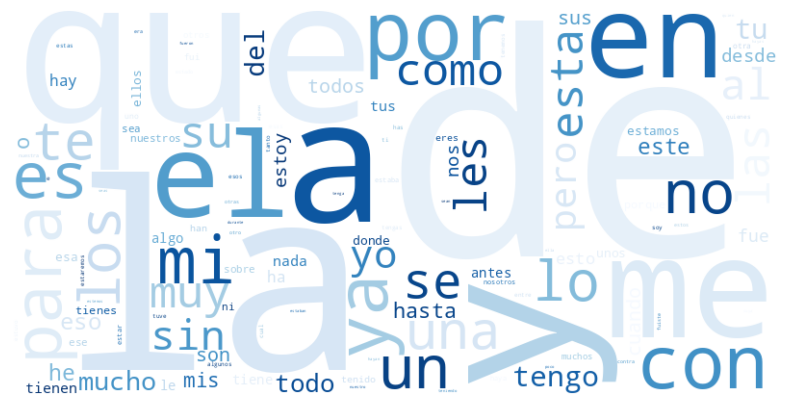

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Configurar el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap= 'Blues').generate_from_frequencies(dic)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Gráfico de stopwords

<ipython-input-25-95688cf2820d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Palabra', data=df, palette="Blues_r")


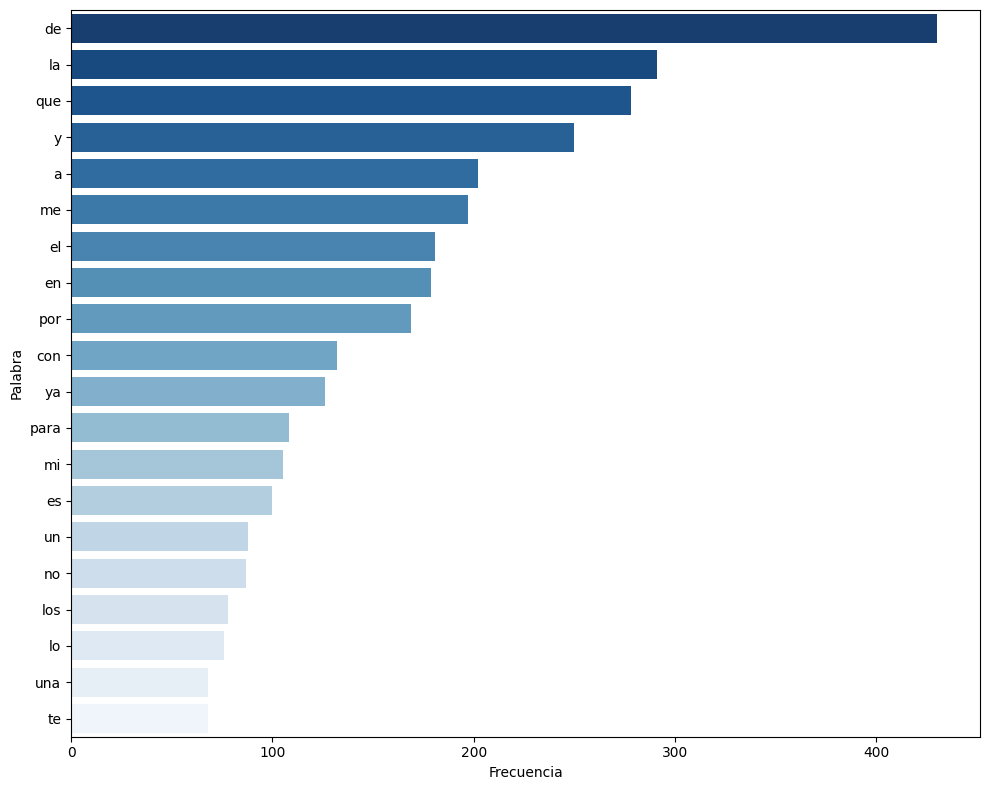

In [ ]:
# frecuencia de los stopwords

import seaborn as sns

# Convertir el diccionario a un DataFrame
df = pd.DataFrame(list(dic.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia
df = df.sort_values(by='Frecuencia', ascending=False)

df = df[:20]

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Frecuencia', y='Palabra', data=df, palette="Blues_r")

# Ajustar las etiquetas del eje y para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Palabras comunes sin quitar stopwords

<ipython-input-26-5afe158a2bf5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette="Blues_r")


<Axes: >

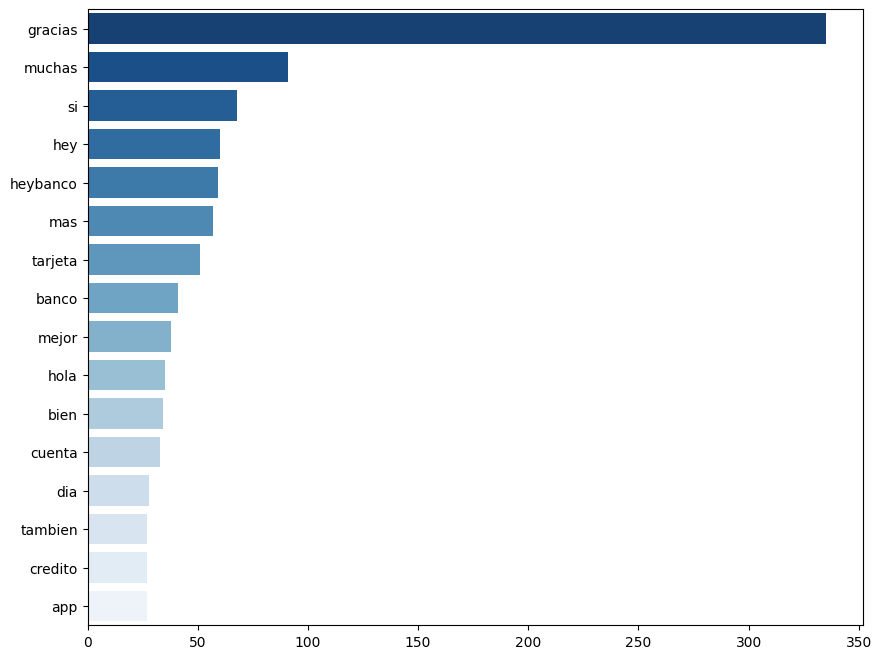

In [ ]:
from collections import Counter

# Palabras comunes sin quitar stopwords

counter=Counter(corpus_stop)
most=counter.most_common()

x, y= [], []
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=y, y=x, palette="Blues_r")


## Wordcloud de más comunes sin quitar stopwords

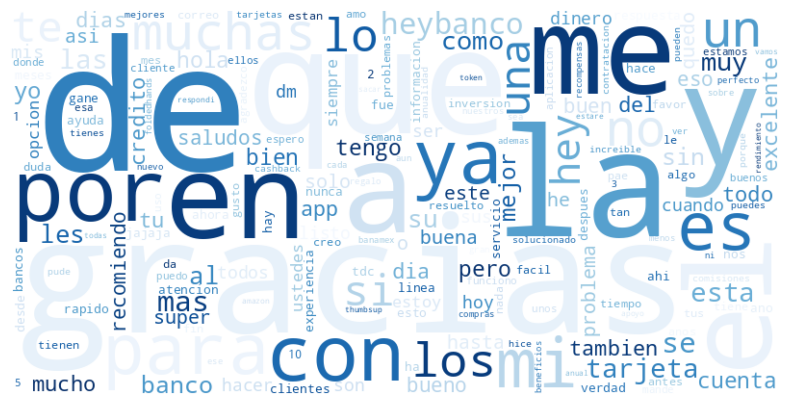

In [ ]:
# Configurar el objeto WordCloud
most_dict = dict(most)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap= 'Blues').generate_from_frequencies(most_dict)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Gráfico de más comunes eliminando los stopwords

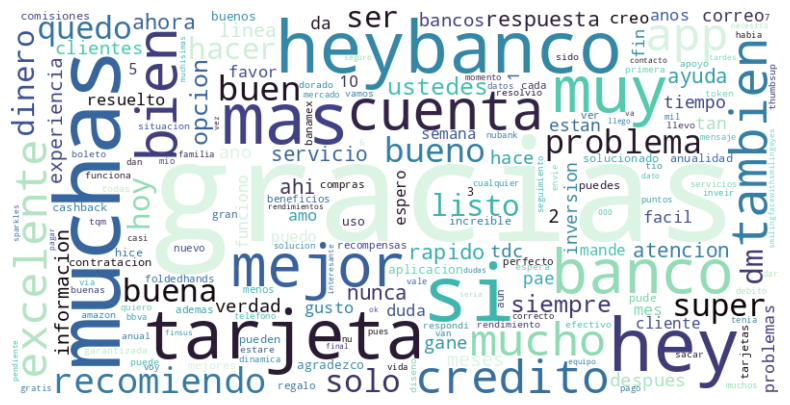

In [ ]:
# Lista de stopwords en español de NLTK
stop_words = set(stopwords.words('spanish'))

# Eliminar "somos" y "era" de la lista de stopwords
# stop_words.discard("muy")
# stop_words.discard("mucho")
# stop_words.discard("muchos")
# stop_words.update("hola")
# stop_words.update("dias")

custom_stop_words = ['hola', 'dias', 'dia', 'jaja', 'jajaja', 'jajajaja', 'saludos', 'asi']
stop_words.update(custom_stop_words)

words_to_remove = ['muy', 'mucho', 'muchas', 'muchos', 'mucha', 'muy', 'mas']
stop_words = stop_words.difference(words_to_remove)

# Filtrar el diccionario eliminando stopwords y otras palabras no deseadas
filtered_word_dict = {word: count for word, count in most_dict.items() if word not in stop_words}

# Configurar el objeto WordCloud con el diccionario filtrado
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap= 'mako').generate_from_frequencies(filtered_word_dict)

# Visualizar la nube de palabras

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<ipython-input-29-047441ae3f51>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Palabra', data=df2, palette="Blues_r")


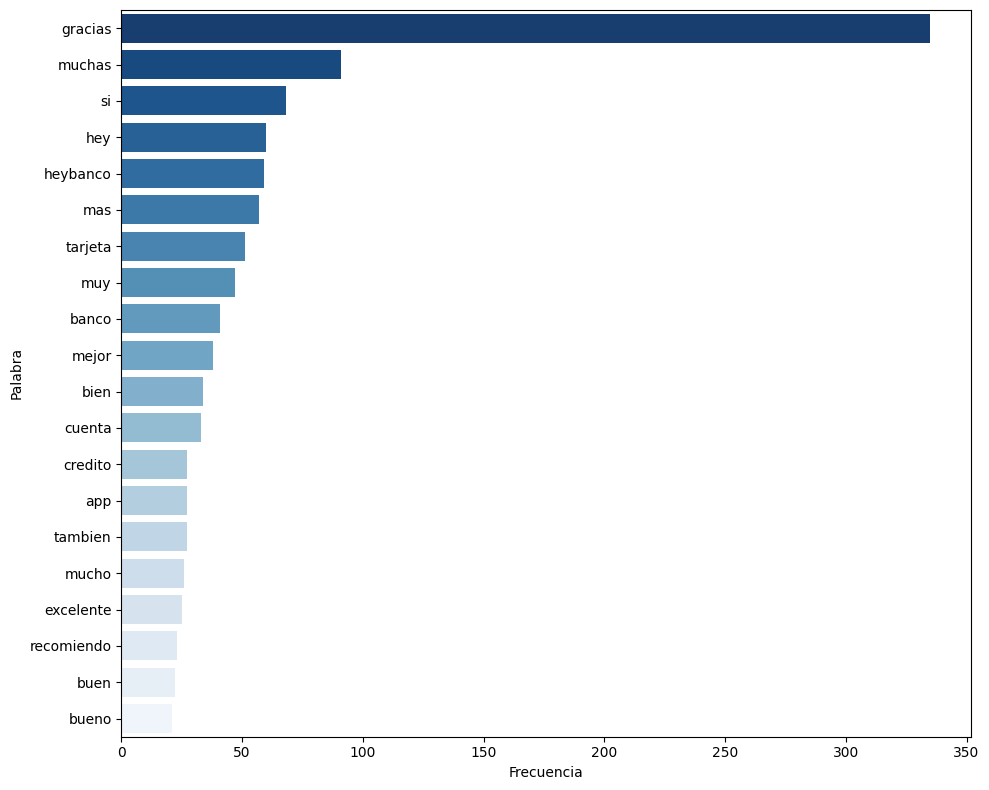

In [ ]:
# Palabras comunes sin stopwords

# Convertir el diccionario a un DataFrame
df2 = pd.DataFrame(list(filtered_word_dict.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia
df2 = df2.sort_values(by='Frecuencia', ascending=False)

df2 = df2[:20]

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Frecuencia', y='Palabra', data=df2, palette="Blues_r")

# Ajustar las etiquetas del eje y para que no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
filtered_word_dict

{'gracias': 335,
 'muchas': 91,
 'si': 68,
 'hey': 60,
 'heybanco': 59,
 'mas': 57,
 'tarjeta': 51,
 'muy': 47,
 'banco': 41,
 'mejor': 38,
 'bien': 34,
 'cuenta': 33,
 'tambien': 27,
 'credito': 27,
 'app': 27,
 'mucho': 26,
 'excelente': 25,
 'recomiendo': 23,
 'buen': 22,
 'bueno': 21,
 'problema': 20,
 'super': 19,
 'quedo': 19,
 'solo': 19,
 'buena': 19,
 'dm': 17,
 'hacer': 17,
 'dinero': 17,
 'listo': 17,
 'ser': 17,
 'hoy': 17,
 'siempre': 16,
 'ustedes': 16,
 'opcion': 16,
 'respuesta': 16,
 'ahora': 16,
 'rapido': 16,
 'servicio': 15,
 'nunca': 15,
 'ayuda': 15,
 'atencion': 15,
 'ahi': 15,
 '2': 14,
 'informacion': 14,
 'meses': 14,
 'experiencia': 14,
 'linea': 14,
 'ano': 13,
 'despues': 13,
 'gane': 13,
 'verdad': 13,
 'tdc': 13,
 'bancos': 13,
 'clientes': 13,
 'hace': 13,
 'inversion': 12,
 'da': 12,
 'pae': 12,
 'tiempo': 12,
 'tan': 12,
 'correo': 12,
 'estan': 12,
 'resuelto': 11,
 'facil': 11,
 'problemas': 11,
 'favor': 11,
 'anos': 11,
 '1': 11,
 '10': 11,
 'mes':

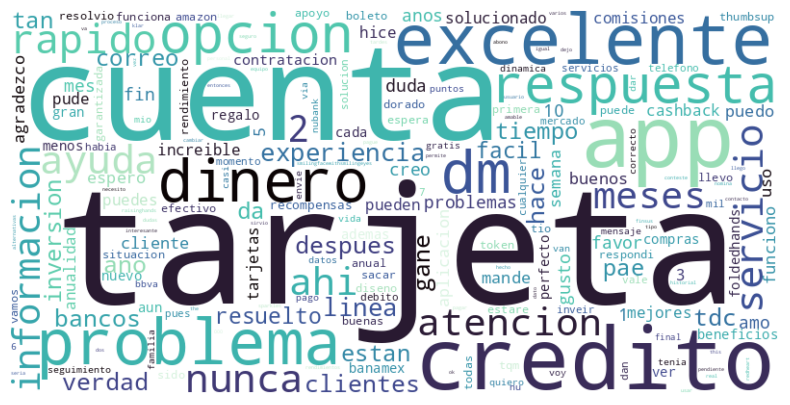

In [ ]:
# Lista de stopwords en español de NLTK
stop_words = set(stopwords.words('spanish'))

# Eliminar "somos" y "era" de la lista de stopwords
# stop_words.discard("muy")
# stop_words.discard("mucho")
# stop_words.discard("muchos")
# stop_words.update("hola")
# stop_words.update("dias")

custom_stop_words = ['hola', 'dias', 'dia', 'jaja', 'jajaja', 'jajajaja', 'saludos', 'asi',
                     'gracias','muchas','hey','heybanco','si','mas','buen','muy','mucha','muchas','banco',
                     'mejor','tambien','bien','bueno','recomiendo','super','buena','listo','solo','hoy',
                     'siempre','ustedes','quedo','muchisimas','ahora','bueno','ser','hacer']
stop_words.update(custom_stop_words)

# words_to_remove = ['muy', 'mucho', 'muchas', 'muchos', 'mucha', 'muy', 'mas']
# stop_words = stop_words.difference(words_to_remove)

# Filtrar el diccionario eliminando stopwords y otras palabras no deseadas
filtered_word_dict = {word: count for word, count in most_dict.items() if word not in stop_words}

# Configurar el objeto WordCloud con el diccionario filtrado
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap= 'mako').generate_from_frequencies(filtered_word_dict)

# Visualizar la nube de palabras

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# comentarios sin stop words
from collections import defaultdict

# El diccionario de stopwords de SHF es dic

# Función para quitar stopwords de una lista de palabras
def quitar_stopwords(lista_palabras):
    return [palabra for palabra in lista_palabras if palabra.lower() in filtered_word_dict]

# Aplicar la función a la columna 'settlement'
tweet_sin_stopwords = data['tweet'].apply(lambda lista: ' '.join(quitar_stopwords(lista)))

# Mostrar el DataFrame resultante
tweet_sin_stopwords


0      resuelto muchisimas gracias excelente servicio...
1                               muchas gracias espero dm
2                                         muchas gracias
3      similar paso queria renovar token poder hacer ...
4      yeeeei traves cuenta acabo contratar cuenta ah...
                             ...                        
807                      ahora confirmo gracias estimado
808                   pensiveface acuerdo muchas gracias
809    tio van graduar tdc garantizada hace mas ano s...
810    duda ver si problemas aumentar linea credito t...
811    wey mejor puedo pagar apple pay starstruckpart...
Name: tweet, Length: 812, dtype: object

In [ ]:
len(tweet_sin_stopwords)

812

In [ ]:
data['tweet'] = tweet_sin_stopwords

In [ ]:
data.isna().sum()

date       0
time     388
tweet      0
dtype: int64

In [ ]:
data.to_csv('data_correcto.csv', sep =',')

## Wordcloud de bigramas

In [ ]:
import wordcloud
from nltk import ngrams
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data['tweet'] = data['tweet'].str.split()

In [ ]:
data['tweet']

0      [resuelto, muchisimas, gracias, excelente, ser...
1                          [muchas, gracias, espero, dm]
2                                      [muchas, gracias]
3      [similar, paso, queria, renovar, token, poder,...
4      [yeeeei, traves, cuenta, acabo, contratar, cue...
                             ...                        
807                 [ahora, confirmo, gracias, estimado]
808              [pensiveface, acuerdo, muchas, gracias]
809    [tio, van, graduar, tdc, garantizada, hace, ma...
810    [duda, ver, si, problemas, aumentar, linea, cr...
811    [wey, mejor, puedo, pagar, apple, pay, starstr...
Name: tweet, Length: 812, dtype: object

In [ ]:
# Función para generar bigramas a partir de una lista de tokens
def generate_bigrams(tokens):
    return [' '.join(bigram) for bigram in ngrams(tokens, 2)]

# Aplicar la función generate_bigrams a la columna 'tokens'
data['tweet'] = data['tweet'].apply(generate_bigrams)

In [ ]:
data['tweet']

0      [resuelto muchisimas, muchisimas gracias, grac...
1            [muchas gracias, gracias espero, espero dm]
2                                       [muchas gracias]
3      [similar paso, paso queria, queria renovar, re...
4      [yeeeei traves, traves cuenta, cuenta acabo, a...
                             ...                        
807    [ahora confirmo, confirmo gracias, gracias est...
808    [pensiveface acuerdo, acuerdo muchas, muchas g...
809    [tio van, van graduar, graduar tdc, tdc garant...
810    [duda ver, ver si, si problemas, problemas aum...
811    [wey mejor, mejor puedo, puedo pagar, pagar ap...
Name: tweet, Length: 812, dtype: object

In [ ]:
# Corpus de bigramas

corpus_stop2 =[]

dic2 = []

# data_tweet = data['tweet'].str.values()

data_tweet2 = data['tweet'].values.tolist()
corpus_stop2 =[word for i in data_tweet2 for word in i]


<ipython-input-42-37573cae6a83>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette="Blues_r")


<Axes: >

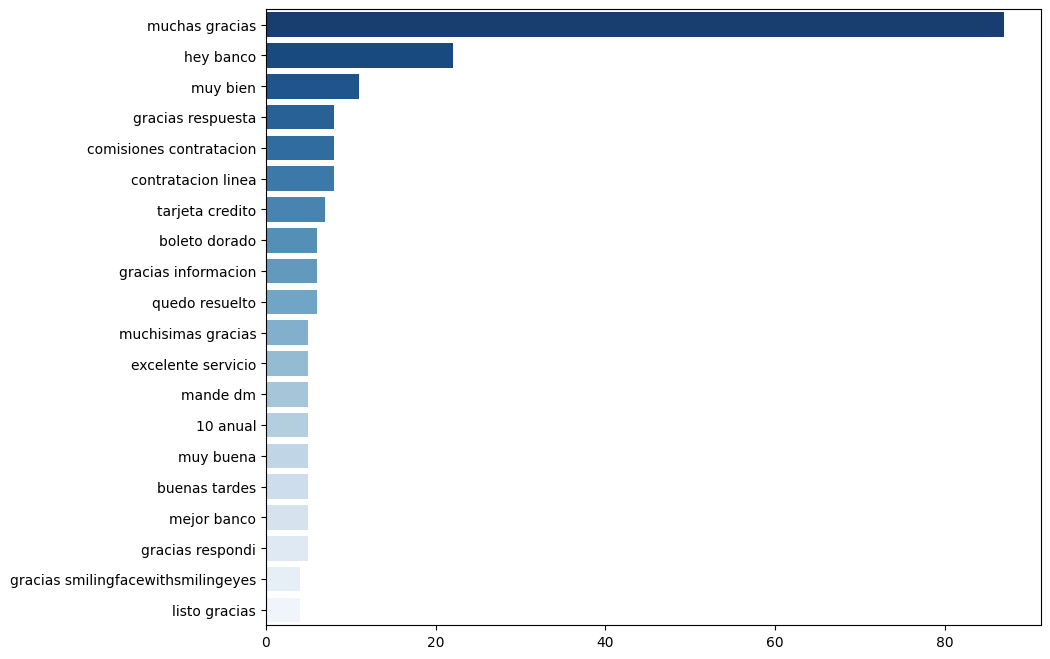

In [ ]:
from collections import Counter

# Palabras comunes sin quitar stopwords

counter2=Counter(corpus_stop2)
most2=counter2.most_common()

x, y= [], []
for word,count in most2[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=y, y=x, palette="Blues_r")

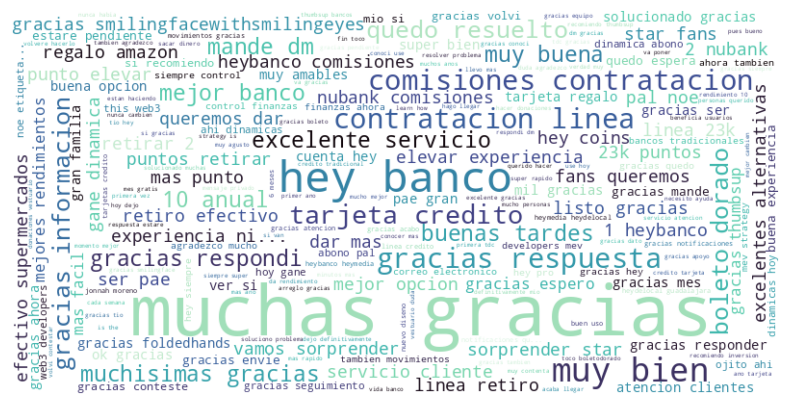

In [ ]:
# Configurar el objeto WordCloud con el diccionario de bigramas
most_dict = dict(most2)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap= 'mako').generate_from_frequencies(most_dict)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
data

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet
0,2023-01-01,NaN,"[resuelto muchisimas, muchisimas gracias, grac..."
1,2023-01-02,NaN,"[muchas gracias, gracias espero, espero dm]"
2,2023-01-02,NaN,[muchas gracias]
3,2023-01-02,NaN,"[similar paso, paso queria, queria renovar, re..."
4,2023-01-02,NaN,"[yeeeei traves, traves cuenta, cuenta acabo, a..."
...,...,...,...
807,2024-04-21,15:21:43,"[ahora confirmo, confirmo gracias, gracias est..."
808,2024-04-23,22:52:05,"[pensiveface acuerdo, acuerdo muchas, muchas g..."
809,2024-04-23,21:30:12,"[tio van, van graduar, graduar tdc, tdc garant..."
810,2024-04-25,00:51:24,"[duda ver, ver si, si problemas, problemas aum..."


In [ ]:
data.to_csv('bigrama_cleaned.csv')

# Análisis de sentimiento

### Segmentación usando Score de Sentimiento

In [ ]:
df = pd.read_csv("hey_sent_processed.csv")
df['datetime'] = pd.to_datetime(df['date'])


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,date,time,tweet,tweet_translated,tweet_traducido,etiqueta_sentimiento,score_sentimiento,datetime
0,0,2023-01-01,NaN,resuelto muchisimas gracias excelente servicio...,Solved thank you very much excellent service a...,Solved thank you very much excellent service a...,Positive,0.981783,2023-01-01
1,1,2023-01-02,NaN,muchas gracias espero dm,Thank you very much I hope DM,Thank you very much I hope DM,Positive,0.979839,2023-01-02
2,2,2023-01-02,NaN,muchas gracias,thank you so much,thank you so much,Positive,0.977976,2023-01-02
3,3,2023-01-02,NaN,similar paso queria renovar token poder hacer ...,Similar step I wanted to renew token to be abl...,Similar step I wanted to renew token to be abl...,Positive,0.732132,2023-01-02
4,4,2023-01-02,NaN,yeeeei traves cuenta acabo contratar cuenta ah...,Yeeeei miscounting I end up hiring savings cha...,Yeeeei miscounting I end up hiring savings cha...,Neutral,0.848944,2023-01-02
...,...,...,...,...,...,...,...,...,...
801,807,2024-04-21,15:21:43,ahora confirmo gracias estimado,Now I confirm thanks estimated,Now I confirm thanks estimated,Positive,0.665152,2024-04-21
802,808,2024-04-23,22:52:05,pensiveface acuerdo muchas gracias,pensiveface agreement thank you very much,pensiveface agreement thank you very much,Positive,0.951612,2024-04-23
803,809,2024-04-23,21:30:12,tio van graduar tdc garantizada hace mas ano s...,Uncle van Graduar TDC guaranteed more anus I s...,Uncle van Graduar TDC guaranteed more anus I s...,Positive,0.521554,2024-04-23
804,810,2024-04-25,00:51:24,duda ver si problemas aumentar linea credito t...,Doubts see if problems increase credit line he...,Doubts see if problems increase credit line he...,Neutral,0.489181,2024-04-25


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet,tweet_translated,tweet_traducido,etiqueta_sentimiento,score_sentimiento,datetime
0,2023-01-01,NaN,resuelto muchisimas gracias excelente servicio...,Solved thank you very much excellent service a...,Solved thank you very much excellent service a...,Positive,0.981783,2023-01-01
1,2023-01-02,NaN,muchas gracias espero dm,Thank you very much I hope DM,Thank you very much I hope DM,Positive,0.979839,2023-01-02
2,2023-01-02,NaN,muchas gracias,thank you so much,thank you so much,Positive,0.977976,2023-01-02
3,2023-01-02,NaN,similar paso queria renovar token poder hacer ...,Similar step I wanted to renew token to be abl...,Similar step I wanted to renew token to be abl...,Positive,0.732132,2023-01-02
4,2023-01-02,NaN,yeeeei traves cuenta acabo contratar cuenta ah...,Yeeeei miscounting I end up hiring savings cha...,Yeeeei miscounting I end up hiring savings cha...,Neutral,0.848944,2023-01-02
...,...,...,...,...,...,...,...,...
801,2024-04-21,15:21:43,ahora confirmo gracias estimado,Now I confirm thanks estimated,Now I confirm thanks estimated,Positive,0.665152,2024-04-21
802,2024-04-23,22:52:05,pensiveface acuerdo muchas gracias,pensiveface agreement thank you very much,pensiveface agreement thank you very much,Positive,0.951612,2024-04-23
803,2024-04-23,21:30:12,tio van graduar tdc garantizada hace mas ano s...,Uncle van Graduar TDC guaranteed more anus I s...,Uncle van Graduar TDC guaranteed more anus I s...,Positive,0.521554,2024-04-23
804,2024-04-25,00:51:24,duda ver si problemas aumentar linea credito t...,Doubts see if problems increase credit line he...,Doubts see if problems increase credit line he...,Neutral,0.489181,2024-04-25


In [ ]:
print(df.columns)

Index(['date', 'time', 'tweet', 'tweet_translated', 'tweet_traducido',
       'etiqueta_sentimiento', 'score_sentimiento', 'datetime'],
      dtype='object')


In [ ]:
df = df.set_index('datetime')

In [ ]:
df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet,tweet_translated,tweet_traducido,etiqueta_sentimiento,score_sentimiento
datetime,,,,,,,
2023-01-01,2023-01-01,NaN,resuelto muchisimas gracias excelente servicio...,Solved thank you very much excellent service a...,Solved thank you very much excellent service a...,Positive,0.981783
2023-01-02,2023-01-02,NaN,muchas gracias espero dm,Thank you very much I hope DM,Thank you very much I hope DM,Positive,0.979839
2023-01-02,2023-01-02,NaN,muchas gracias,thank you so much,thank you so much,Positive,0.977976
2023-01-02,2023-01-02,NaN,similar paso queria renovar token poder hacer ...,Similar step I wanted to renew token to be abl...,Similar step I wanted to renew token to be abl...,Positive,0.732132
2023-01-02,2023-01-02,NaN,yeeeei traves cuenta acabo contratar cuenta ah...,Yeeeei miscounting I end up hiring savings cha...,Yeeeei miscounting I end up hiring savings cha...,Neutral,0.848944
...,...,...,...,...,...,...,...
2024-04-21,2024-04-21,15:21:43,ahora confirmo gracias estimado,Now I confirm thanks estimated,Now I confirm thanks estimated,Positive,0.665152
2024-04-23,2024-04-23,22:52:05,pensiveface acuerdo muchas gracias,pensiveface agreement thank you very much,pensiveface agreement thank you very much,Positive,0.951612
2024-04-23,2024-04-23,21:30:12,tio van graduar tdc garantizada hace mas ano s...,Uncle van Graduar TDC guaranteed more anus I s...,Uncle van Graduar TDC guaranteed more anus I s...,Positive,0.521554


In [ ]:
# Segementar por sentimiento

df_positive = df[df["etiqueta_sentimiento"] == "Positive"]
df_neutral = df[df["etiqueta_sentimiento"] == "Neutral"]
df_negative = df[df["etiqueta_sentimiento"] == "Negative"]

In [ ]:
df_negative['tweet']

datetime
2023-02-27                                 problema falla dalay
2023-03-11                              yeah mejores pesar veto
2023-04-04    cuento hice tampoco tenia historial tenia nuba...
2023-05-19                       siii muchos unamusedface chale
2023-05-23    recomiendo ampliamente usen alternativas llama...
2023-07-19    toman enserio perooo nunca dejare usar cheems ...
2023-10-21                                         11 inversion
2023-10-25    bueno tiempo ahora tarjeta ira cajon nunca wav...
2023-10-28    bueno tiempo ahora tarjeta ira cajon nunca wav...
2023-12-09    jamas pense quedaria hey banco despues todas m...
2024-01-21         raro realizado varias transacciones problema
2024-02-07    mejor aumenten lineas credito loudlycryingface...
2024-04-10                               tambien necesito ayuda
Name: tweet, dtype: object

In [ ]:
# # Serie de tiempo por semana
positive_weekly = df_positive.resample("W").size()
neutral_weekly = df_neutral.resample("W").size()
negative_weekly = df_negative.resample("W").size()

# Frecuencia por semana
positive_weekly_freq = df_positive.resample("W").size().value_counts().sort_index()
neutral_weekly_freq = df_neutral.resample("W").size().value_counts().sort_index()
negative_weekly_freq = df_negative.resample("W").size().value_counts().sort_index()

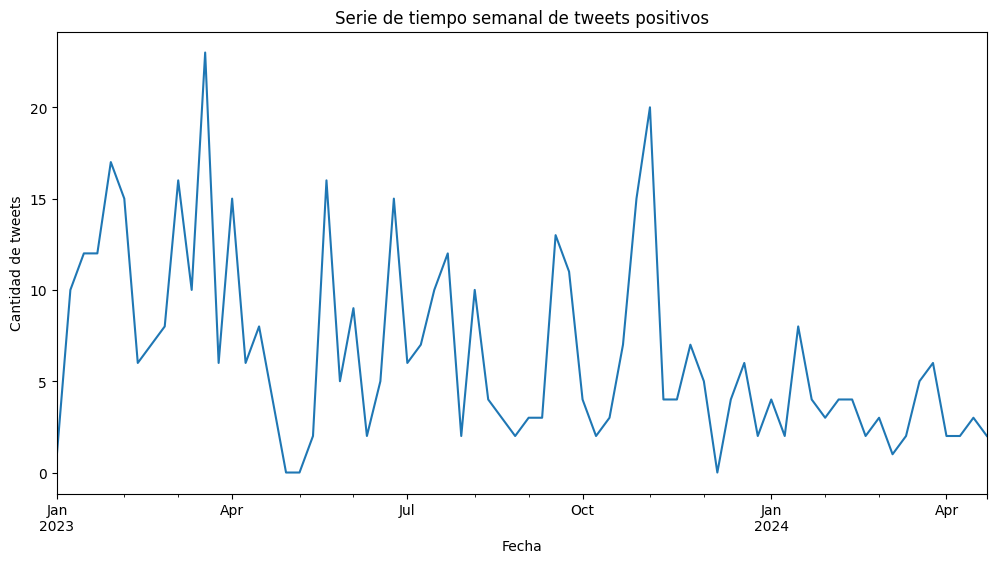

In [ ]:
# Graficar la serie de tiempo
positive_weekly.plot(figsize=(12, 6))
plt.title('Serie de tiempo semanal de tweets positivos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de tweets')
plt.show()

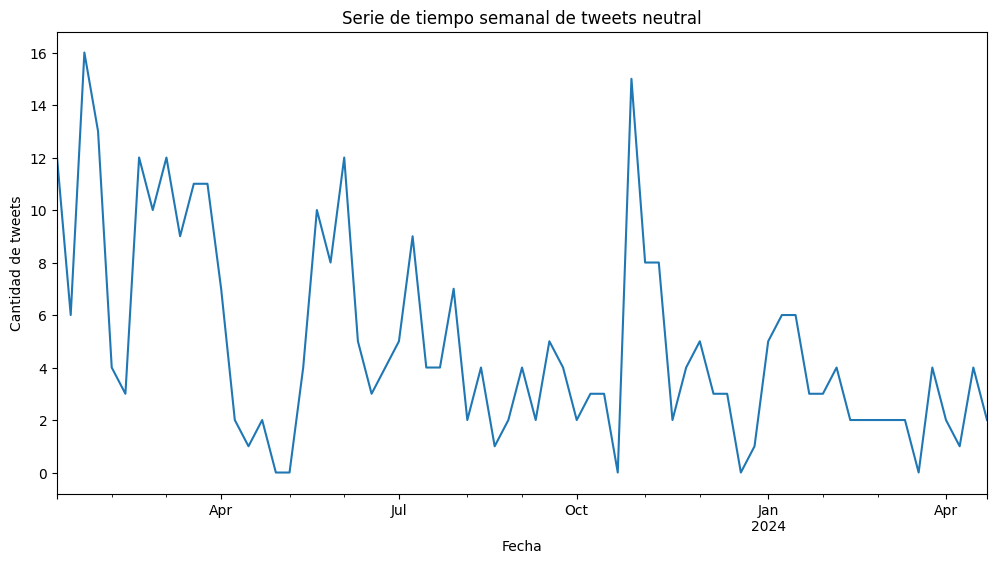

In [ ]:
# Graficar la serie de tiempo
neutral_weekly.plot(figsize=(12, 6))
plt.title('Serie de tiempo semanal de tweets neutral')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de tweets')
plt.show()

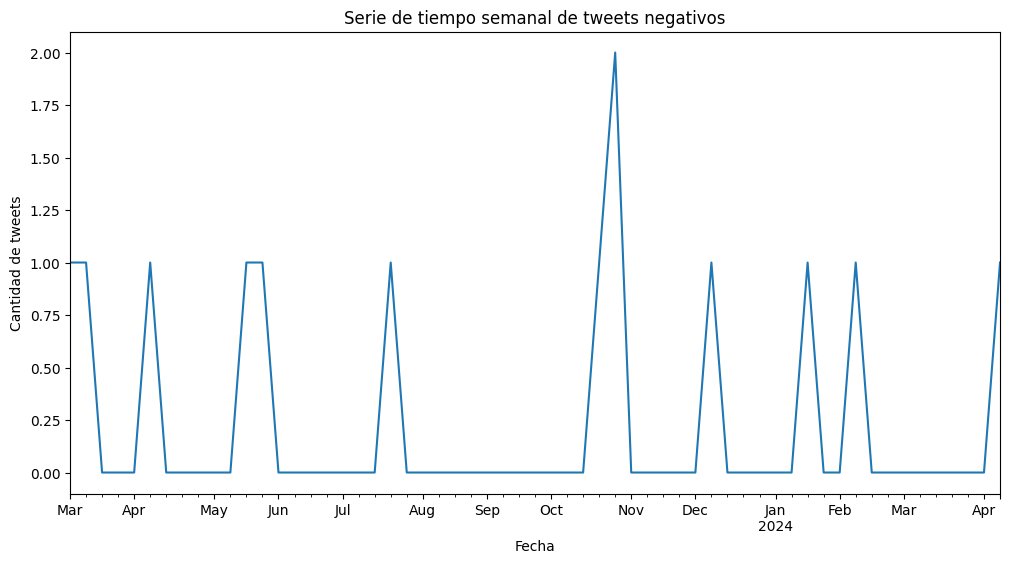

In [ ]:
# Graficar la serie de tiempo
negative_weekly.plot(figsize=(12, 6))
plt.title('Serie de tiempo semanal de tweets negativos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de tweets')
plt.show()

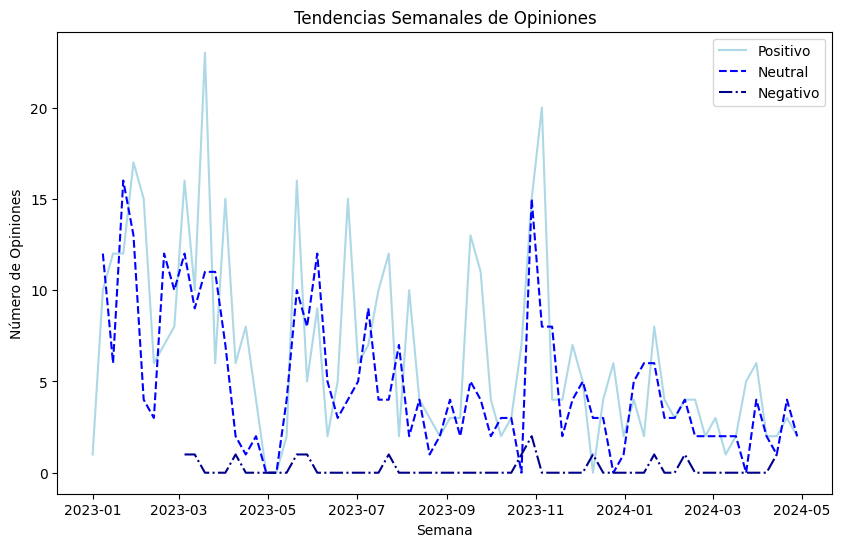

In [ ]:

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar las tres series de tiempo
plt.plot(positive_weekly.index, positive_weekly, label='Positivo', linestyle='-', color='lightblue')  # Línea verde para positivo
plt.plot(neutral_weekly.index, neutral_weekly, label='Neutral', linestyle='--', color='blue')   # Línea azul para neutral
plt.plot(negative_weekly.index, negative_weekly, label='Negativo', linestyle='-.', color='darkblue') # Línea roja para negativo

# Añadir etiquetas y título
plt.title('Tendencias Semanales de Opiniones')
plt.xlabel('Semana')
plt.ylabel('Número de Opiniones')
plt.legend()

# Mostrar el gráfico
plt.show()

<ipython-input-59-bb71e28a70f9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='day_of_week', data=df, scale='count', palette = 'mako')
<ipython-input-59-bb71e28a70f9>:16: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='day_of_week', data=df, scale='count', palette = 'mako')


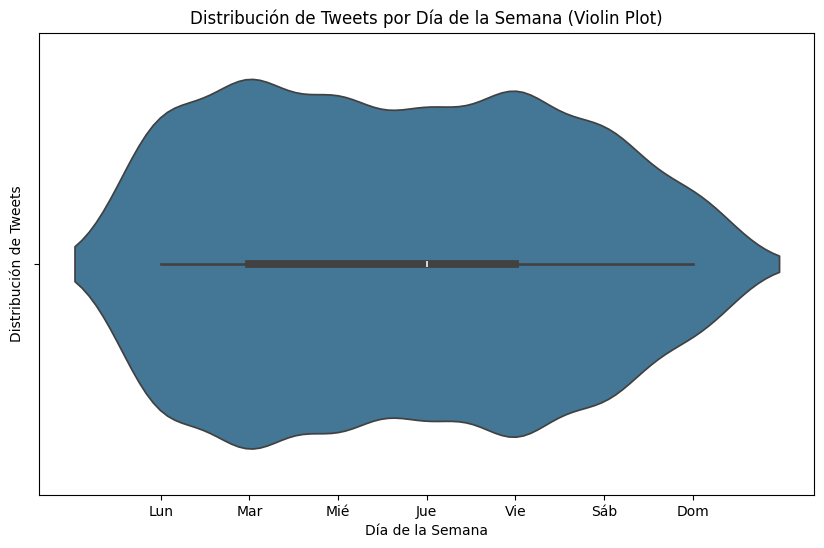

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'df' con una columna 'date' con información temporal
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Aseguramos que no haya NaN después de convertir a datetime
df = df.dropna(subset=['date'])

# Extraer el día de la semana (0 = lunes, 6 = domingo)
df['day_of_week'] = df['date'].dt.dayofweek

# Hacer un violin plot para visualizar la distribución de tweets por día de la semana
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_week', data=df, scale='count', palette = 'mako')

# Ajustar etiquetas y títulos para claridad
plt.xticks(ticks=range(7), labels=['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
plt.xlabel('Día de la Semana')
plt.ylabel('Distribución de Tweets')
plt.title('Distribución de Tweets por Día de la Semana (Violin Plot)')

plt.show()


<ipython-input-60-9672d4078c56>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='day_of_month', data=df_tweets, scale='count',  palette = 'mako')
<ipython-input-60-9672d4078c56>:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='day_of_month', data=df_tweets, scale='count',  palette = 'mako')


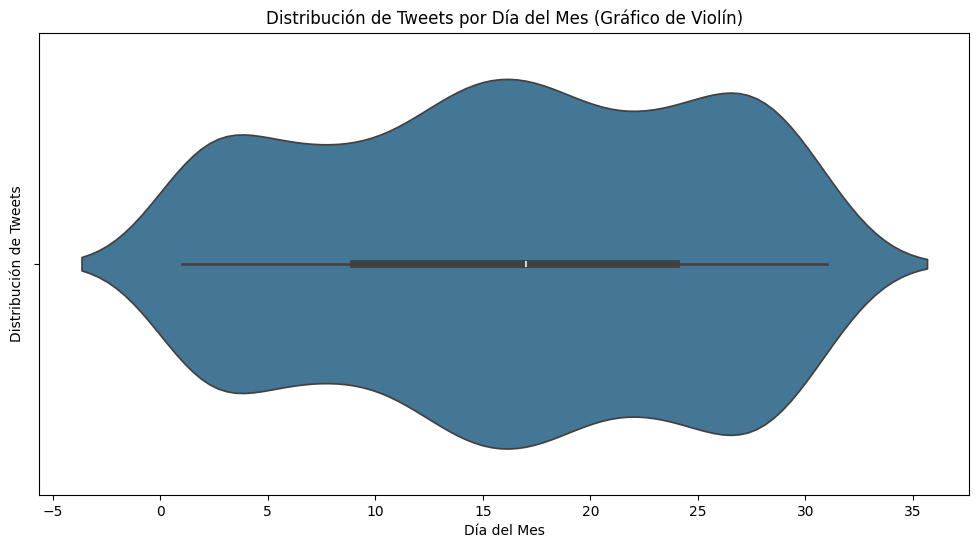

In [ ]:

df_tweets = df

# Convertir la columna de fechas a tipo datetime
df_tweets['date'] = pd.to_datetime(df_tweets['date'])

# Extraer el día del mes
df_tweets['day_of_month'] = df_tweets['date'].dt.day

# Crear un gráfico de violín para visualizar la distribución de tweets por día del mes
plt.figure(figsize=(12, 6))
sns.violinplot(x='day_of_month', data=df_tweets, scale='count',  palette = 'mako')

# Etiquetas y título para mayor claridad
plt.xlabel('Día del Mes')
plt.ylabel('Distribución de Tweets')
plt.title('Distribución de Tweets por Día del Mes (Gráfico de Violín)')

plt.show()

<ipython-input-61-ec9c20da7f3c>:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='day_of_month', data=df, hue='etiqueta_sentimiento',  palette = 'Blues',  scale='count', split=True)


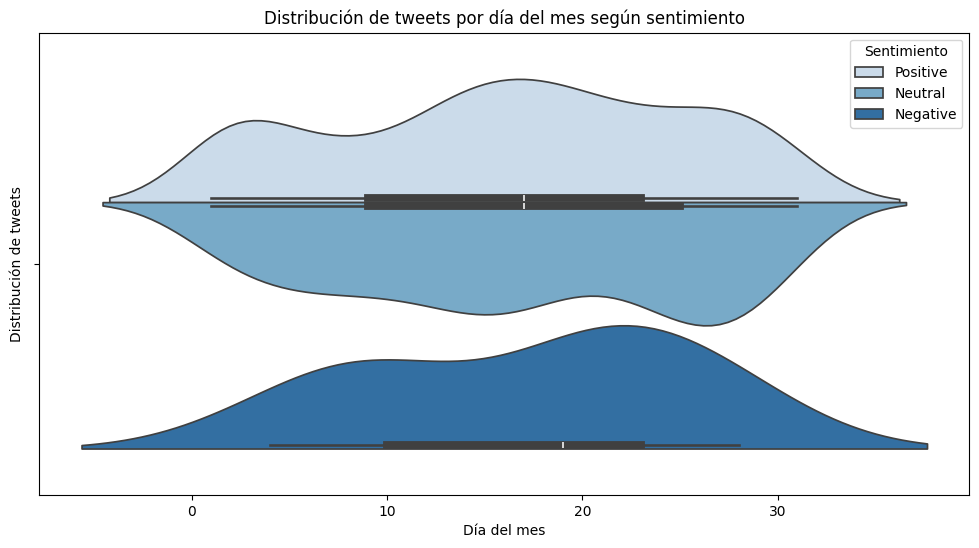

In [ ]:

# Convertir a datetime y extraer el día del mes
df['date'] = pd.to_datetime(df['date'])
df['day_of_month'] = df['date'].dt.day

# Crear el gráfico de violín conjunto con hue para diferenciar por sentimiento
plt.figure(figsize=(12, 6))
sns.violinplot(x='day_of_month', data=df, hue='etiqueta_sentimiento',  palette = 'Blues',  scale='count', split=True)

# Etiquetas y títulos para claridad
plt.xlabel('Día del mes')
plt.ylabel('Distribución de tweets')
plt.title('Distribución de tweets por día del mes según sentimiento')

# Añadir leyenda para identificar sentimientos
plt.legend(title='Sentimiento')

# Mostrar el gráfico
plt.show()

<ipython-input-62-71ff49281f48>:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x='day_of_week', data=df, hue='etiqueta_sentimiento', scale='count', palette = 'mako', split=True) #data=df, scale='count')


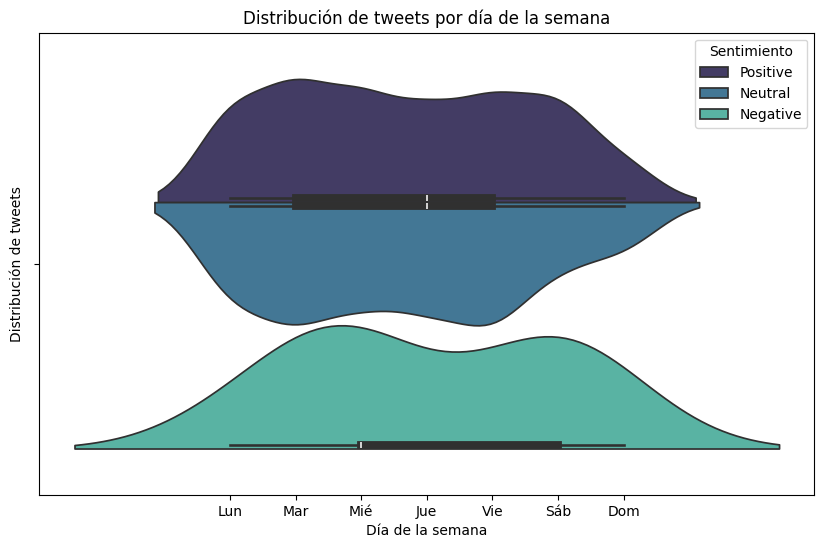

In [ ]:

# Supongamos que tienes un DataFrame llamado 'df' con una columna 'date' con información temporal
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Aseguramos que no haya NaN después de convertir a datetime
df = df.dropna(subset=['date'])

# Extraer el día de la semana (0 = lunes, 6 = domingo)
df['day_of_week'] = df['date'].dt.dayofweek

# Hacer un violin plot para visualizar la distribución de tweets por día de la semana
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_week', data=df, hue='etiqueta_sentimiento', scale='count', palette = 'mako', split=True) #data=df, scale='count')

# Ajustar etiquetas y títulos para claridad
plt.xticks(ticks=range(7), labels=['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
plt.xlabel('Día de la semana')
plt.ylabel('Distribución de tweets')
plt.title('Distribución de tweets por día de la semana')

plt.legend(title='Sentimiento')

plt.show()

# Tópicos

In [ ]:
datap = pd.read_csv(drive_path + "hey_sentiment.csv")

In [ ]:
datap

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet,Traduccion,sentimiento_predicho,etiqueta_sentimiento,score_sentimiento
0,2023-01-01,NaN,"Resuelto, muchísimas gracias , excelente servi...","Resolved, thank you very much, excellent servi...",0,Positive,0.981286
1,2023-01-02,NaN,"Muchas gracias, espero su dm","Thank you very much, I wait for your DM",0,Positive,0.965958
2,2023-01-02,NaN,Muchas gracias!,Thank you so much!,0,Positive,0.985176
3,2023-01-02,NaN,Algo similar me paso. Quería renovar mi token ...,Something similar happened to me.I wanted to r...,0,Positive,0.620426
4,2023-01-02,NaN,Yeeeei! a través de mi cuenta en acabo de cont...,Yeeeei!Through my account I just hired my savi...,0,Positive,0.944924
...,...,...,...,...,...,...,...
807,2024-04-21,15:21:43,"Ahora confirmo, gracias estimado","Now I confirm, thanks estimated",0,Positive,0.742703
808,2024-04-23,22:52:05,😔 de acuerdo!! Muchas gracias.,😔 Okay !!Thank you so much.,0,Positive,0.971911
809,2024-04-23,21:30:12,"Tío cuando me van a graduar, tengo la TDC gara...","Uncle when they are going to graduate, I have ...",0,Neutral,0.593953
810,2024-04-25,00:51:24,"una duda, con quién tengo que ver si tengo pro...","A question, with whom I have to do if I have t...",0,Neutral,0.580344


In [ ]:
from difflib import get_close_matches

# Definir los temas y palabras clave a buscar
topic_to_search = {
    'Inversión': ['inversion', 'rendimiento'],
    'Tarjeta': ['tarjeta', 'tarjetas', 'debito'],
    'Cuenta': ['cuenta','ahorro'],
    'Crédito': ['credito', 'cashback', 'anual', 'anualidad', 'interes', 'tasa','linea',
                'tdc','recompensas','recompensa','linea'],
    'Comisiones': ['comisiones', 'comision'],
    'Servicio': ['servicio','atencion','experiencia','seguimiento'],
    'Contratación': ['contratacion'],
    'App': ['app', 'aplicacion'],
    'Competencia': ['nu','nubank','bbva','banamex','bancoppel']
}

# Función para verificar si alguna de las palabras está presente en el texto
def check_words(text):
    for topic, keywords in topic_to_search.items():
        for word in keywords:
            if word in text:
              matches = get_close_matches(word, text.split(), n=1, cutoff=0.8)  # Ajusta el umbral según sea necesario
              if matches:
                return topic
    return False

# Aplicar la función a la columna 'text' y crear una nueva columna 'Tema'
datap['Tema'] = datap['tweet'].apply(check_words)


In [ ]:
frec = datap.groupby(["Tema", "etiqueta_sentimiento"]).size().reset_index(name='Conteo')
frec = frec[frec['Tema'] != False]
frec

,Tema,etiqueta_sentimiento,Conteo
3,App,Neutral,2
4,App,Positive,15
5,Comisiones,Positive,4
6,Competencia,Neutral,1
7,Competencia,Positive,4
8,Crédito,Neutral,2
9,Crédito,Positive,19
10,Cuenta,Negative,2
11,Cuenta,Neutral,2
12,Cuenta,Positive,23


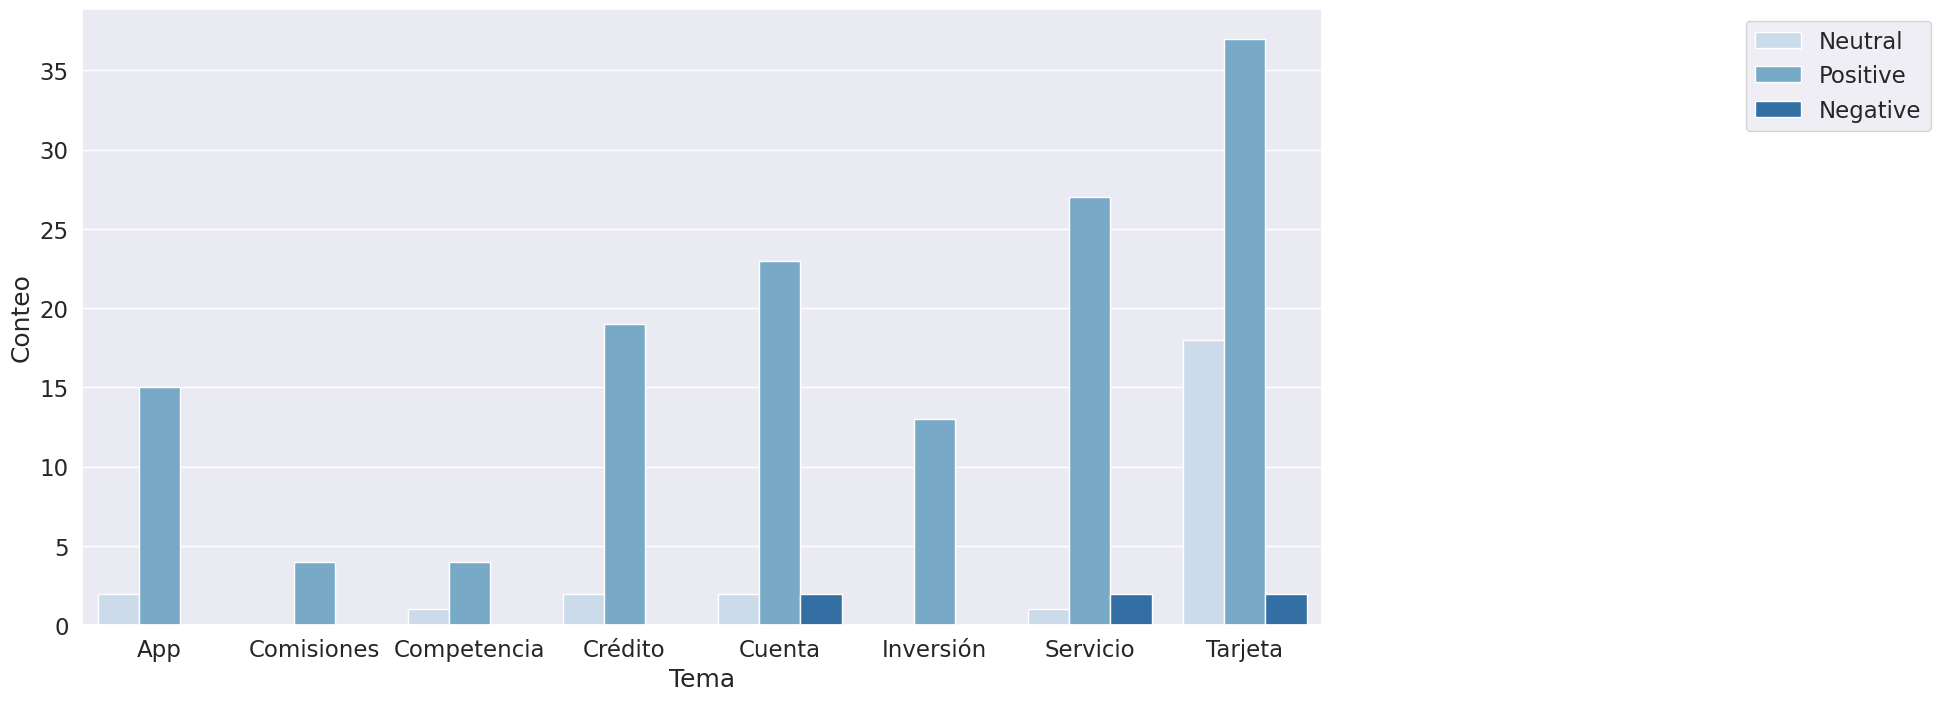

In [ ]:
import seaborn as sns
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(16, 8))
g=sns.barplot(x='Tema', y="Conteo",hue='etiqueta_sentimiento', data=frec,palette="Blues")
#g.set(xlabel ="Región", ylabel = "Porcentaje", title ='Porcentaje con respecto al total de observaciones')
g.legend(bbox_to_anchor= (1.5,1))
plt.show()
sns.set()

# Ejemplos

## Ejemplo de respuesta automatico usando respuestas predeterminadas

In [ ]:
import pandas as pd
df = pd.read_csv("hey_sent_processed.csv")

In [ ]:
# VErificar que 'etiqueta_sentimiento' esté bien configurada
df['etiqueta_sentimiento'] = df['etiqueta_sentimiento'].str.lower()

In [ ]:
# Respuestas predeterminadas por sentimiento
respuestas_sentimiento = {
    "positive": "Estamos felices de saber que estás satisfecho con nuestro servicio.",
    "negative": " Gracias por tu consulta, lamentamos que estés experimentando inconvenientes con nuestra app. En breve nos comunicaremos contigo por DM.",
    "neutral": "Gracias por tu comentario. Si tienes alguna pregunta o necesitas ayuda, recuerda que siempre puedes acércarte a nuestro canales."
}

# Una función para obtener la respuesta adecuada según sentimiento y tópico
def obtener_respuesta(texto, sentimiento):
    topico = identificar_topico(texto)  # Identificar el tópico
    respuesta_topico = respuestas_topico.get(topico, "Gracias por tu mensaje.")

    respuesta_sentimiento = respuestas_sentimiento.get(sentimiento.lower(), "")

    # Combinar respuesta por tópico y sentimiento
    respuesta_final = f"{respuesta_sentimiento} {respuesta_topico}"
    return respuesta_final


Ejemplo de uso

In [ ]:
# Simulación de un tweet con un sentimiento y texto
tweet_text = "Tengo un problema con la app, no me deja iniciar sesión."
sentimiento = "negative"

# Obtener la respuesta para el tweet
respuesta = obtener_respuesta(tweet_text, sentimiento)
print("Respuesta automática:", respuesta)


Respuesta automática: Lamentamos escuchar que tu experiencia no fue positiva. Trabajaremos para mejorar. Gracias por tu consulta sobre nuestra app. ¿En qué podemos ayudarte?


In [ ]:
# Simulación de un tweet con un sentimiento y texto
tweet_text = df['tweet'][13]
sentimiento = df['etiqueta_sentimiento'][13]

# Obtener la respuesta para el tweet
respuesta = obtener_respuesta(tweet_text, sentimiento)
print("Tweet:", tweet_text)
print("Sentimiento:", sentimiento)
print("Respuesta automática:", respuesta)

Tweet: si bloquee desbloquee pude hacer deposito oxxo gracias
Sentimiento: neutral
Respuesta automática: Gracias por tu comentario. Si tienes alguna pregunta o necesitas ayuda, estamos aquí para ti. Gracias por tu mensaje.


## Ejemplo de filtro por tópico

In [ ]:
import re

# Definir las palabras clave para cada tópico
topicos = {
    "app": ["app", "aplicación", "aplicacion", 'tecnicos', 'tecnicos'],
    "comisiones": ["comisiones", "cobros", 'comision', ],
    "competencia": ["nu", "bbva", 'nu','nubank','bbva','banamex','bancoppel'],
    "cuenta débito": ["cuenta débito", "cuenta debito", "cuenta", 'debito', 'tarjeta', 'ahorro'],
    "inversión 10% 11%": ["10%", "11%", "inversión", "inversion", 'rendimiento'],
    "Servicio/Atención a clientes": ['servicio','atencion','experiencia','seguimiento', "atención a clientes", "servicio al cliente"],
    "Tarjetas de crédito": ['credito', 'cashback', 'anual', 'anualidad', 'interes', 'tasa','linea',
                            'tdc','recompensas','recompensa','linea', "tarjeta de crédito", "tarjeta de credito", 'tdc', 'tarjeta'],
    "Contratación": ['contratacion']
}

# Respuestas predeterminadas por tópico
respuestas_topico = {
    "app": "Gracias por tu consulta sobre nuestra app. En breve te mandaremos un DM para resolver este inconveniente.",
    "comisiones": "Entendemos tu preocupación por las comisiones. Nuestro equipo te puede ayudar a aclarar cualquier duda.",
    "competencia": "Aspirar a más es posible, conócenos, tenemos el producto ideal para ti.",
    "cuenta débito": "Gracias por tu interés en nuestras cuentas de débito. ¿Hay algo que te gustaría saber?",
    "inversión 10% 11%": "Nuestros productos de inversión ofrecen tasas atractivas. ¿Te gustaría más información?",
    "Servicio/Atención a clientes": "Estamos aquí para ayudarte. ¿Tienes alguna pregunta sobre nuestro servicio al cliente?",
    "Tarjetas de crédito": "Te agradecemos por preguntar sobre nuestras tarjetas de crédito. ¿Te gustaría saber más?"
}

# Una función para identificar el tópico del tweet
def identificar_topico(texto):
    for topico, palabras_clave in topicos.items():
        for palabra in palabras_clave:
            if re.search(palabra, texto, re.IGNORECASE):
                return topico
    return None


In [ ]:
# Función para identificar el tópico según las palabras clave
def identificar_topico(texto):
    for topico, palabras_clave in topicos.items():
        for palabra in palabras_clave:
            if re.search(palabra, texto, re.IGNORECASE):  # Ignora mayúsculas y minúsculas
                return topico
    return None


Ejemplo de uso

In [ ]:
# Simulación de un tweet con un sentimiento y texto
tweet_text = "Hola @heybanco  mi app no me permite hacer transferencias a ninguna cuenta. Me pueden ayudar por favor ?"
topico = identificar_topico(tweet_text)

# Obtener la respuesta para el tweet
respuesta = respuestas_topico.get(topico, "Gracias por tu mensaje.")

print("Tweet:", tweet_text)
print("Tópico:", topico)
print("Respuesta automática:", respuesta)

Tweet: Hola @heybanco  mi app no me permite hacer transferencias a ninguna cuenta. Me pueden ayudar por favor ?
Tópico: app
Respuesta automática: Gracias por tu consulta sobre nuestra app. En breve te mandaremos un DM para resolver este inconveniente.


In [ ]:
# Simulación de un tweet con un sentimiento y texto
tweet_text = df['tweet'][333]
topico = identificar_topico(tweet_text)

# Obtener la respuesta para el tweet
respuesta = respuestas_topico.get(topico, "Gracias por tu mensaje.")
print("Tweet:", tweet_text)
print("Tópico:", topico)
print("Respuesta automática:", respuesta)

Tweet: solicito apoyo
Tópico: None
Respuesta automática: Gracias por tu mensaje.
